### Installing the libraries we need


In [14]:
pip install sqlalchemy psycopg2 pandas

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Connecting to postgresql

In [5]:
from sqlalchemy import create_engine

In [17]:
# For data loading and analysis
import pandas as pd


In [18]:
# For numerical operations
import numpy as np

In [19]:
# For plotting/visualization
import matplotlib.pyplot as plt

In [20]:
# For advanced visualizations 
import seaborn as sns

In [21]:
# Loading the CSV file
df = pd.read_csv(r"C:\Users\User\Desktop\BOSTON PROJECT\listings.csv")


In [23]:
# Shows first 5 rows of the data
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,NaN,East Boston,42.36413,-71.02991,Entire home/apt,125.0,29,26,2024-08-09,0.21,1,326,0,NaN
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,NaN,Roxbury,42.32844,-71.09581,Entire home/apt,129.0,3,138,2025-07-28,0.69,11,67,9,STR-490093
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,NaN,Roxbury,42.32802,-71.09387,Entire home/apt,168.0,3,141,2025-07-29,0.72,11,56,8,STR-491702
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,NaN,Beacon Hill,42.35867,-71.06307,Entire home/apt,140.0,91,29,2024-05-15,0.21,4,277,0,NaN
4,10811,Bostons Best Rentals -Studio Prestigious Back Bay,38997,Michelle,NaN,Back Bay,42.35173,-71.08685,Entire home/apt,166.0,91,9,2019-07-22,0.08,12,218,0,NaN


In [24]:
# Shows the last 5 rows of the data
df.tail(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
4414,1514629096140818505,Third floor room - free parking,92524206,Ray,NaN,East Boston,42.386050,-71.004350,Private room,111.0,1,0,NaN,NaN,4,126,0,STR-516897
4415,1514714940012290884,NEW! LUX 3BR w/ 400 Mbps Wifi | ROKU TV & Games!,578741487,Michael,NaN,Roxbury,42.328810,-71.092560,Entire home/apt,463.0,1,0,NaN,NaN,10,349,0,Exempt: This listing is a unit that has contra...
4416,1514744484553712874,Luxury23.5 - Boston Landing - Allston Yards,757253,Lee,NaN,Brighton,42.354440,-71.139870,Entire home/apt,363.0,1,0,NaN,NaN,11,360,0,Exempt: This listing is a unit that has contra...
4417,1515306685708974789,Free parking - room 3,92524206,Ray,NaN,East Boston,42.384600,-71.006150,Private room,111.0,1,0,NaN,NaN,4,240,0,STR-517671
4418,1515466025834395498,East Boston Garden Apartment – Monthly Stays,104683790,Francesco,NaN,East Boston,42.376632,-71.037903,Entire home/apt,103.0,29,0,NaN,NaN,3,296,0,NaN


## Show shape of dataset(Rows and columns)

In [25]:
#general shape of data set
df.shape
#Lets show the number of rows and columns
print("No of Rows",df.shape[0])
print("No of Columns",df.shape[1])

No of Rows 4419
No of Columns 18


## Show general information about the dataset

In [26]:
#summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              4419 non-null   int64  
 1   name                            4419 non-null   object 
 2   host_id                         4419 non-null   int64  
 3   host_name                       4418 non-null   object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   4419 non-null   object 
 6   latitude                        4419 non-null   float64
 7   longitude                       4419 non-null   float64
 8   room_type                       4419 non-null   object 
 9   price                           3506 non-null   float64
 10  minimum_nights                  4419 non-null   int64  
 11  number_of_reviews               4419 non-null   int64  
 12  last_review                     34

# Data Overview and Cleaning

### Handle missing values

In [27]:
#lets first check if there is any missing values-answer to be yes or no (boolean value)
print("Do we have missing value?",df.isnull().values.any())

Do we have missing value? True


In [ ]:
#host_name → only 1 missing; we can fill with "Unknown"
df['host_name'].fillna("Unknown", inplace=True)

In [ ]:
# Drop columns that are completely empty
# 'neighbourhood_group' has 0 non-null values, so it's useless
df.drop(columns=['neighbourhood_group'], inplace=True)

In [ ]:
# last_review → fill missing with "No Review"
df['last_review'].fillna("No Review", inplace=True)

In [ ]:
# reviews_per_month → missing means no reviews → fill with 0
df['reviews_per_month'].fillna(0, inplace=True)

In [ ]:
# license → fill missing with "Not Provided"
df['license'].fillna("Not Provided", inplace=True)

### conversion of data type

In [33]:
# Convert last_review to datetime
# Replace "No Review" with NaT (Not a Time)
df['last_review'] = df['last_review'].replace("No Review", pd.NaT)

In [34]:
# Convert to datetime type
df['last_review'] = pd.to_datetime(df['last_review'])

### Remove unrealistic values

In [36]:
# Price must be > 0
df = df[df['price'] > 0]

In [37]:
# Minimum nights should be > 0
df = df[df['minimum_nights'] > 0]

### Remove duplicates

In [38]:
df.drop_duplicates(inplace=True)

### Preview cleaned data

In [39]:
df.head(5)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3781,HARBORSIDE-Walk to subway,4804,Frank,East Boston,42.36413,-71.02991,Entire home/apt,125.0,29,26,2024-08-09,0.21,1,326,0,Not Provided
1,5506,** Fort Hill Inn Private! Minutes to center!**,8229,Terry,Roxbury,42.32844,-71.09581,Entire home/apt,129.0,3,138,2025-07-28,0.69,11,67,9,STR-490093
2,6695,"Fort Hill Inn *Sunny* 1 bedroom, condo duplex",8229,Terry,Roxbury,42.32802,-71.09387,Entire home/apt,168.0,3,141,2025-07-29,0.72,11,56,8,STR-491702
3,8789,Curved Glass Studio/1bd facing Park,26988,Anne,Beacon Hill,42.35867,-71.06307,Entire home/apt,140.0,91,29,2024-05-15,0.21,4,277,0,Not Provided
4,10811,Bostons Best Rentals -Studio Prestigious Back Bay,38997,Michelle,Back Bay,42.35173,-71.08685,Entire home/apt,166.0,91,9,2019-07-22,0.08,12,218,0,Not Provided


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3506 entries, 0 to 4418
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              3506 non-null   int64         
 1   name                            3506 non-null   object        
 2   host_id                         3506 non-null   int64         
 3   host_name                       3506 non-null   object        
 4   neighbourhood                   3506 non-null   object        
 5   latitude                        3506 non-null   float64       
 6   longitude                       3506 non-null   float64       
 7   room_type                       3506 non-null   object        
 8   price                           3506 non-null   float64       
 9   minimum_nights                  3506 non-null   int64         
 10  number_of_reviews               3506 non-null   int64         
 11  last_revi

# Exploratory Data Analysis (EDA)

### Univariate Analysis - One Variable at a Time

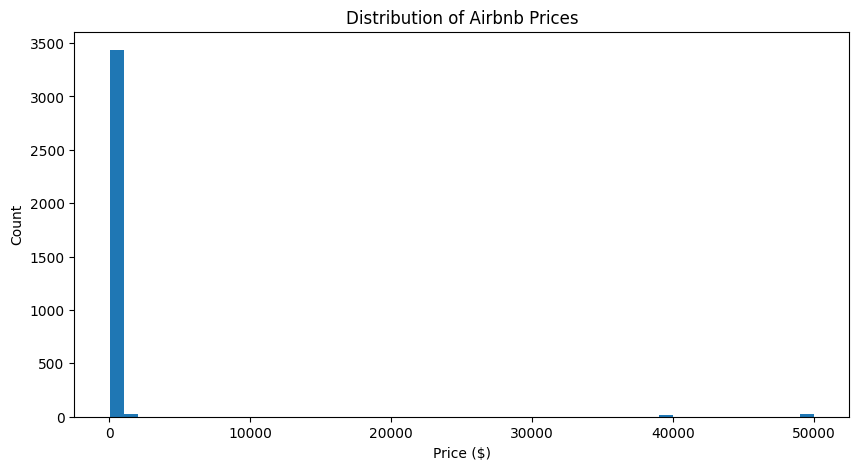

In [41]:
# Price distribution
plt.figure(figsize=(10,5))
plt.hist(df['price'], bins=50)
plt.title("Distribution of Airbnb Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

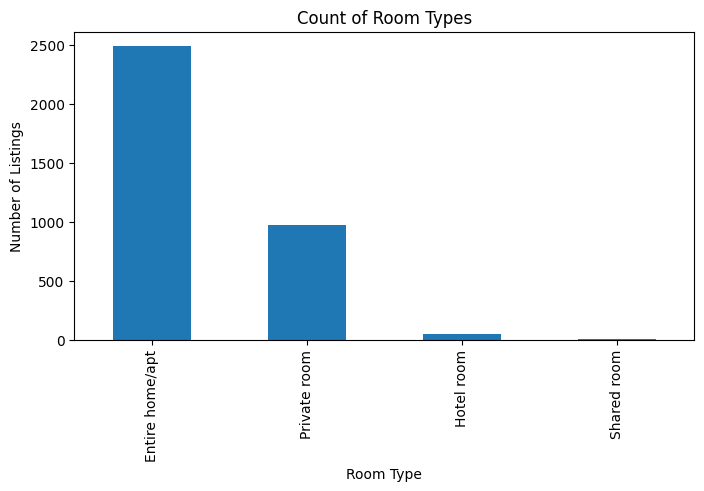

In [42]:
# Count of room types
df['room_type'].value_counts().plot(kind='bar', figsize=(8,4))
plt.title("Count of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()

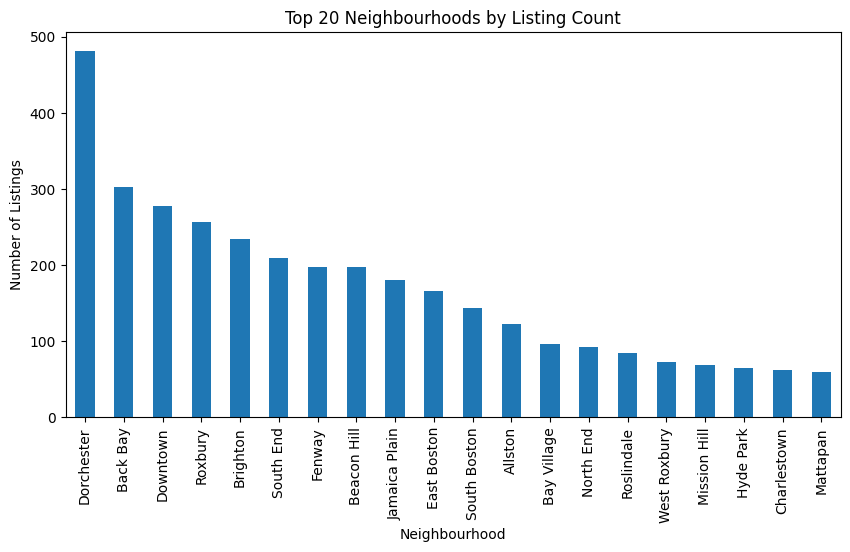

In [43]:
# Listings per neighbourhood
df['neighbourhood'].value_counts().head(20).plot(kind='bar', figsize=(10,5))
plt.title("Top 20 Neighbourhoods by Listing Count")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of Listings")
plt.show()

### Bivariate Analysis - Relationships Between Variables

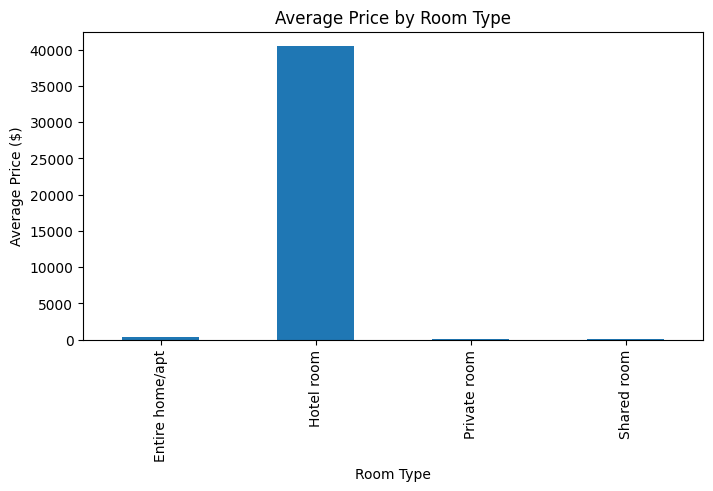

In [44]:
# Average price by room type
df.groupby('room_type')['price'].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Price by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Average Price ($)")
plt.show()

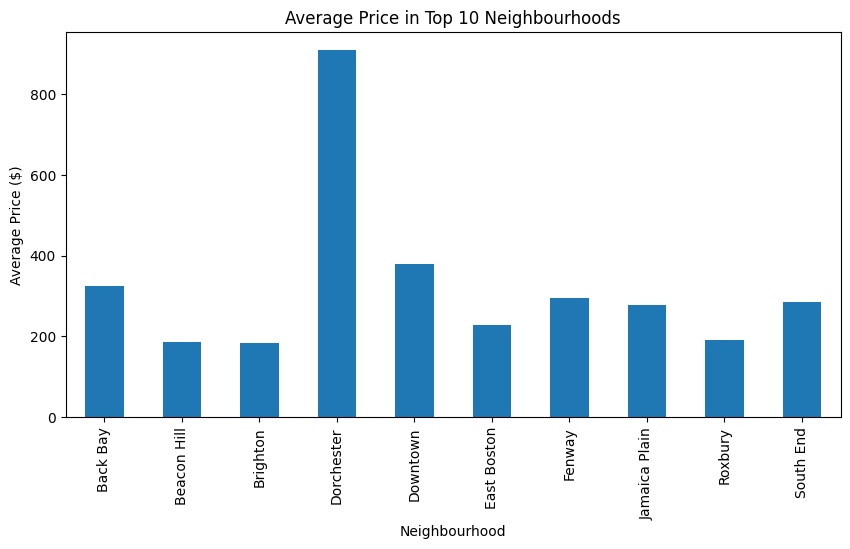

In [45]:
# Select top 10 neighbourhoods
top_neigh = df['neighbourhood'].value_counts().head(10).index

# Average price for top 10 neighbourhoods
df[df['neighbourhood'].isin(top_neigh)].groupby('neighbourhood')['price'].mean().plot(kind='bar', figsize=(10,5))
plt.title("Average Price in Top 10 Neighbourhoods")
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price ($)")
plt.show()

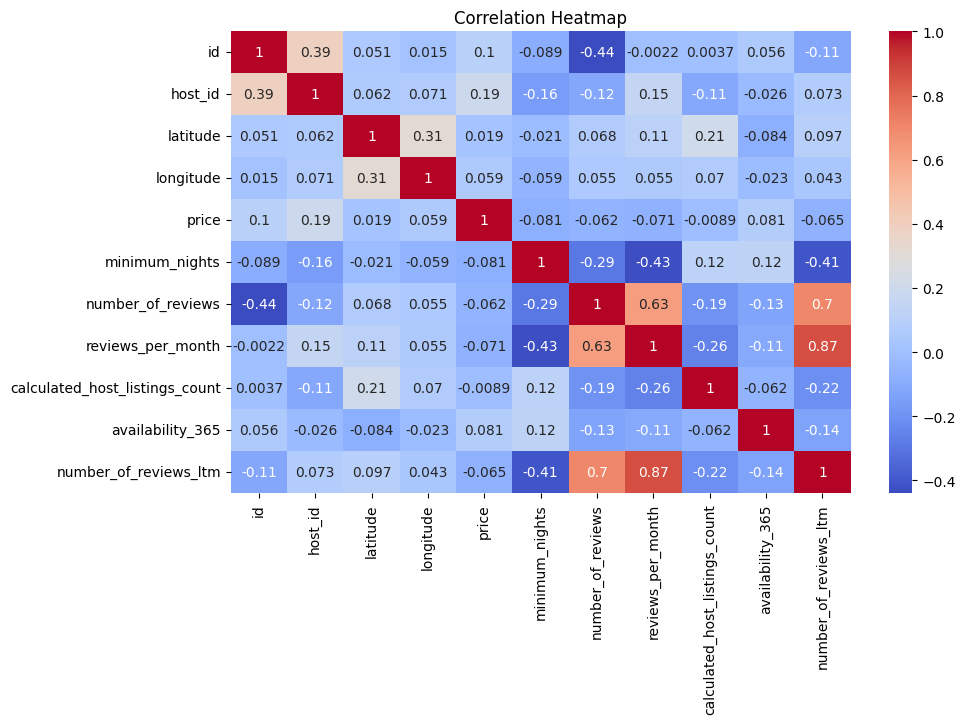

In [48]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Rename the cleaned data
df.to_csv("cleaned_listings.csv", index=False)


# Load cleaned data to postgresql

In [54]:
from sqlalchemy import create_engine

# my actual credentials 
username = "postgres"
password = "4212"
host = "localhost"
port = "5432"
dbname = "airbnb_boston"

engine = create_engine(f"postgresql://{username}:{password}@{host}:{port}/{dbname}")


In [55]:
try:
    with engine.connect() as conn:
        print("Connection successful!")
except Exception as e:
    print("Connection failed:", e)


Connection successful!


In [56]:
df.to_sql("cleaned_listings", engine, index=False, if_exists="replace", schema="listings")


506